In [8]:
import pathlib
import sqlite3
import pandas as pd
import seaborn as sns
import sys
sys.path.append("./")
from utils import *

In [3]:

database_dir = pathlib.Path("databases/")
database_file = pathlib.Path("weather_bucharest.db")
database_filepath = database_dir / database_file

db_con = sqlite3.connect(database_filepath)
db_cur = db_con.cursor()

In [4]:
weather_df = pd.read_sql("SELECT * FROM weather", db_con)

db_con.close()

In [5]:
weather_df

,index_d,year,month,day,min_t,max_t,mean_t,pp
0,0,1950,1,1,-6.690000,2.050000,-3.490000,0.0
1,1,1950,1,2,-9.220000,-2.190000,-3.570000,0.0
2,2,1950,1,3,-6.380000,1.110000,-0.990000,0.0
3,3,1950,1,4,-7.040000,4.460000,0.960000,1.0
4,4,1950,1,5,-4.840000,0.400000,-2.370000,2.6
...,...,...,...,...,...,...,...,...
27205,27205,2024,6,26,21.400000,32.989998,26.519999,0.0
27206,27206,2024,6,27,19.369999,33.049999,25.330000,0.0
27207,27207,2024,6,28,16.740000,32.579998,23.619999,0.0
27208,27208,2024,6,29,19.260000,34.649998,26.090000,0.0


In [7]:
# Minimum temperature per year
# Group by 'year' and find the minimum temperature
year_min_temp_df = weather_df.groupby("year", as_index=False).agg(min_temperature=("min_t", "min"))
year_min_temp_df

,year,min_temperature
0,1950,-24.789999
1,1951,-9.139999
2,1952,-16.410000
3,1953,-17.570000
4,1954,-25.219999
...,...,...
70,2020,-9.170000
71,2021,-11.270000
72,2022,-9.330000
73,2023,-9.790000


<Axes: xlabel='year', ylabel='min_temperature'>

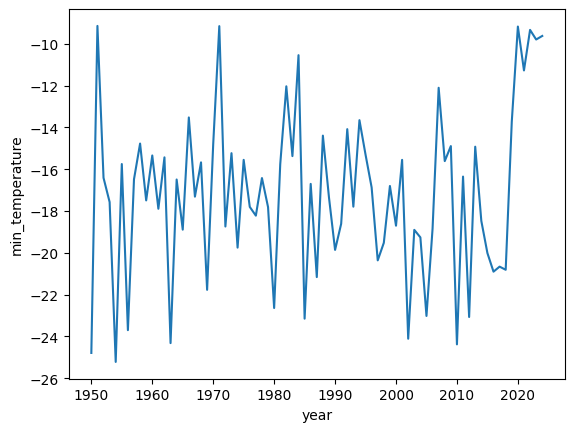

In [9]:
sns.lineplot(x="year", y="min_temperature",
             data=year_min_temp_df)

In [15]:
year_max_temp_df = weather_df.groupby("year", as_index=False).agg(max_temperature=("max_t", "max"))
year_max_temp_df

,year,max_temperature
0,1950,38.340000
1,1951,39.639999
2,1952,40.099998
3,1953,36.079998
4,1954,36.160000
...,...,...
70,2020,37.480000
71,2021,38.869999
72,2022,40.070000
73,2023,40.290001


<Axes: xlabel='year', ylabel='max_temperature'>

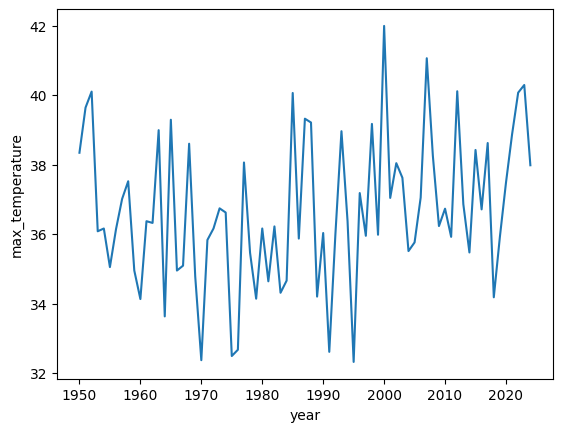

In [16]:
sns.lineplot(x="year", y="max_temperature",
             data=year_max_temp_df)